In [104]:
# !pip install matplotlib

In [16]:
import pandas as pd

In [17]:
# Load data 
data = pd.read_csv('/home/saurabhk/Downloads/books_task.csv')

In [18]:
data.head()

,Unnamed: 0,Title,description,authors,publisher,publishedDate,categories,Impact
0,0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],Smithsonian Institution,1996,['Comics & Graphic Novels'],784.303924
1,1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],825.465535
2,2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],OUP USA,2000,['Religion'],841.705321
3,3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],iUniverse,2005-02,['Fiction'],666.426542
4,5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,1996,['Religion'],806.216143


## Basic Data Exploration

In [19]:
del data['Unnamed: 0']

In [20]:
# Type of data 
data_type = []
for col in data.columns:
    data_type.append({'Column': col,'Datatype': data[col].dtype, 'MissingEntries': data[col].isnull().sum()/data.shape[0]*100})
pd.DataFrame(data_type)

,Column,Datatype,MissingEntries
0,Title,object,0.000000
1,description,object,9.190191
2,authors,object,1.962890
3,publisher,object,0.000000
4,publishedDate,object,0.250858
5,categories,object,0.000000
6,Impact,float64,0.000000


In [21]:
def num_entries(txt):
    '''
    Fuction to get the number of authors or categories per book.
    '''
    if isinstance(txt, str):
        return int(len(eval(txt)))
    else:
        return None

In [22]:
data['num_authors'] = data['authors'].apply(num_entries)
data['num_categories'] = data['categories'].apply(num_entries)

In [23]:
pd.DataFrame(data['num_authors'].value_counts().sort_index(ascending=False))

,count
num_authors,
110.0,1
91.0,1
79.0,1
57.0,1
52.0,1
48.0,1
39.0,1
33.0,3
31.0,2


#### We see that there can be upto 110 authors for a book. Although there are very few books with authors more than 5. We will explore later on how to hande this

In [24]:
data['num_categories'].value_counts()

num_categories
1    138724
Name: count, dtype: int64

#### Unlike authors we have only one category per book, that's great!!

### Extracting list out of string values for authors and categories fields.

In [25]:
def text2List(txt):
    if isinstance(txt, str):
        return eval(txt)
    else:
        return None

In [26]:
data['authors'] = data['authors'].apply(text2List)

In [27]:
data['categories'] = data['categories'].apply(text2List)

In [28]:
# Since there is one catgory per book
# Extracting the category out of list
data['categories'] = data['categories'].apply(lambda x: x[0])

#### Again, Checking for the data type now

In [29]:
# Type of data 
data_type = []
for col in data.columns:
    data_type.append({'Column': col,'Datatype': data[col].dtype, 'MissingEntries': data[col].isnull().sum()/data.shape[0]*100})
pd.DataFrame(data_type)

,Column,Datatype,MissingEntries
0,Title,object,0.000000
1,description,object,9.190191
2,authors,object,1.962890
3,publisher,object,0.000000
4,publishedDate,object,0.250858
5,categories,object,0.000000
6,Impact,float64,0.000000
7,num_authors,float64,1.962890
8,num_categories,int64,0.000000


In [30]:
data.head()

,Title,description,authors,publisher,publishedDate,categories,Impact,num_authors,num_categories
0,Its Only Art If Its Well Hung!,NaN,[Julie Strain],Smithsonian Institution,1996,Comics & Graphic Novels,784.303924,1.0,1
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,[Philip Nel],A&C Black,2005-01-01,Biography & Autobiography,825.465535,1.0,1
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,[David R. Ray],OUP USA,2000,Religion,841.705321,1.0,1
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,[Veronica Haddon],iUniverse,2005-02,Fiction,666.426542,1.0,1
4,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,[Everett Ferguson],Wm. B. Eerdmans Publishing,1996,Religion,806.216143,1.0,1


### Problems with published date
1. No fixed format
2. Not a datetime object
3. Unwanted chars, eg. 1963*, 19??, -01-01 etc

In [177]:
data['publishedDate'].value_counts()

publishedDate
2000          3362
2004          3218
1999          3159
2002          3110
2003          3070
              ... 
1981-12-18       1
1969-11-15       1
2000-03-05       1
2004-07-24       1
2007-08-26       1
Name: count, Length: 10819, dtype: int64

In [188]:
import re

def extract_year(date_str):
    if isinstance(date_str, str):
        match = re.match(r'^(\d{4})[-/*?]', date_str)
        if match:
            return match.group(1)
        return None
    return None

# Example usage
date_str = "19??"
year = extract_year(date_str)
print(f"Year extracted: {year}")


Year extracted: None


In [192]:
data['publishedDateFormatted'] = data['publishedDate'].apply(extract_year)
data['IsYear'] = data['publishedDateFormatted'].apply(lambda x: len(x) if isinstance(x, str) else x)

In [195]:
data['publishedDateFormatted'].describe()

count     83898
unique      100
top        2012
freq       4623
Name: publishedDateFormatted, dtype: object

In [210]:
data[data['publishedDateFormatted']>'1970'].sort_values(by='publishedDateFormatted')

,Title,description,authors,publisher,publishedDate,categories,Impact,num_authors,num_categories,publishedDateFormatted,IsYear
22289,Wisdom of the Mystic Masters,This book contains the most awesome secrets ev...,[Joseph J. Weed],Penguin,1971-02-01,Self-Help,929.438479,1.0,1,1971,4.0
134323,Tibet,The author describes her experiences during a ...,[Alexandra David-Neel],Courier Corporation,1971-01-01,"Body, Mind & Spirit",799.162610,1.0,1,1971,4.0
69681,The categorical imperative: A study in Kant's ...,A classic exposition of Kant's ethical thought.,[H. J. Paton],University of Pennsylvania Press,1971-10-29,Philosophy,799.162610,1.0,1,1971,4.0
12098,The Categorical Imperative,A classic exposition of Kant's ethical thought.,[H. J. Paton],University of Pennsylvania Press,1971-10-29,Philosophy,799.162610,1.0,1,1971,4.0
88941,The collected poems of A E Housman,"Presents the texts, authorized in 1939, of the...",[A. E. Housman],Macmillan,1971-04-15,Poetry,805.568540,1.0,1,1971,4.0
...,...,...,...,...,...,...,...,...,...,...,...
98130,Peace at Last,Jill Murphy's bestselling classic Peace at Las...,[Jill Murphy],Pan Macmillan,2023-08-17,Juvenile Fiction,811.867600,1.0,1,2023,4.0
134235,I'm Coming to Take You to Lunch,"London, 1983. Pop impresario Simon Napier-Bell...",[Simon Napier-Bell],Wm. B. Eerdmans Publishing,2023-04-04,Biography & Autobiography,819.108336,1.0,1,2023,4.0
58691,How the Universe Got Its Spots: Diary of a Fin...,"Mixing memoir and visionary science, a leading...",[Janna Levin],Princeton University Press,2023-01-10,Science,812.846224,1.0,1,2023,4.0
104651,University Ghost Story,"Dr. Veronica Glass, professor of English liter...",[Nick DiMartino],Northwest Corner Books,2023-05-09,Fiction,806.216143,1.0,1,2023,4.0


In [214]:
data[data['publishedDateFormatted']>='1950'].groupby('publishedDateFormatted').describe()['Impact']

,count,mean,std,min,25%,50%,75%,max
publishedDateFormatted,,,,,,,,
1950,7.0,786.858765,45.111859,705.933400,773.794212,805.568540,808.927162,831.066667
1951,11.0,806.411183,40.699348,708.164202,805.568540,806.216143,819.108336,882.726455
1952,6.0,792.013425,31.467086,731.962667,789.620078,805.568540,805.568540,819.108336
1953,7.0,807.871717,23.379479,784.303924,786.674616,805.568540,825.087501,841.705321
1954,9.0,809.559657,43.363709,726.082143,795.886613,802.858931,821.904217,892.462096
...,...,...,...,...,...,...,...,...
2020,2181.0,787.811061,59.879261,276.370338,763.039309,805.568540,819.108336,951.599804
2021,2159.0,786.197695,62.913328,290.116156,763.039309,801.960983,819.108336,954.489817
2022,936.0,789.454252,58.679050,294.001756,767.147946,805.568540,817.899332,957.892175


In [191]:
data['publishedDateFormatted'].isnull().sum()/data.shape[0]*100

np.float64(39.521640091116176)

In [176]:
import re
from datetime import datetime

def clean_and_extract_date(date_str):
    # Remove unwanted characters
    cleaned_date_str = re.sub(r'[^\d/-]', '', date_str)
    # Normalize separators to dashes
    cleaned_date_str = re.sub(r'[/]+', '-', cleaned_date_str)
    
    # Patterns to match various date formats
    patterns = [
        r'^(\d{4})-(\d{2})-(\d{2})$',  # YYYY-MM-DD
        r'^(\d{2})-(\d{2})-(\d{4})$',  # DD-MM-YYYY
        r'^(\d{4})-(\d{1,2})-(\d{1,2})$',  # YYYY-MM-DD or YYYY-MM-D
        r'^(\d{1,2})-(\d{1,2})-(\d{4})$',  # DD-MM-YYYY
        r'^(\d{4})$',  # YYYY
        r'^(\d{4})-(\d{1,2})$',  # YYYY-MM
    ]
    
    # Try each pattern
    for pattern in patterns:
        match = re.match(pattern, cleaned_date_str)
        if match:
            groups = match.groups()
            
            # Handle groups based on length
            if len(groups) == 1:
                # Year-only case
                year = groups[0]
                month = '01'
                day = '01'
            elif len(groups) == 2:
                # Year and month only
                year, month = groups
                day = '01'
            elif len(groups) == 3:
                year, month, day = groups
            
            # Handle ambiguous or incomplete dates
            if len(year) == 2:
                year = '20' + year  # Assuming 20th or 21st century
            
            if len(month) == 1:
                month = '0' + month
            
            if len(day) == 1:
                day = '0' + day
            
            try:
                # Create a datetime object to validate the date
                date_obj = datetime(year=int(year), month=int(month), day=int(day))
                return date_obj.year, date_obj.month, date_obj.day
            except ValueError:
                # Date is invalid, continue to next pattern
                continue

    # If no valid date format was found
    return None, None, None

# Example usage
date_strs = [
    "1963*01-01",
    "1996",
    "2001-08",
    "01-12-2003",
    "15/05/1998",
    "2024/02/30",  # Invalid date
    "2024/12",     # Year and month only
    "2000?01*01",  # Contains unwanted characters
    "??2023/03/15" # Contains unwanted characters
]

for date_str in date_strs:
    year, month, day = clean_and_extract_date(date_str)
    print(f"Input: {date_str} -> Year: {year}, Month: {month}, Day: {day}")






Input: 1963*01-01 -> Year: None, Month: None, Day: None
Input: 1996 -> Year: 1996, Month: 1, Day: 1
Input: 2001-08 -> Year: 2001, Month: 8, Day: 1
Input: 01-12-2003 -> Year: None, Month: None, Day: None
Input: 15/05/1998 -> Year: None, Month: None, Day: None
Input: 2024/02/30 -> Year: None, Month: None, Day: None
Input: 2024/12 -> Year: 2024, Month: 12, Day: 1
Input: 2000?01*01 -> Year: None, Month: None, Day: None
Input: ??2023/03/15 -> Year: 2023, Month: 3, Day: 15


In [1]:
# for d in dt:
#     print (d, clean_and_extract_date(d))


In [146]:
dt = data['publishedDate']
dt = [x.replace('*', '') for x in dt if isinstance(x, str)]

In [2]:
# pd.to_datetime(dt, format='mixed')

In [152]:
data[data['publishedDate']=='19??']

,Title,description,authors,publisher,publishedDate,categories,Impact,num_authors,num_categories
11535,The American method of dog training,NaN,[Jay Rapp],Wm. B. Eerdmans Publishing,19??,Dogs,819.108336,1.0,1
14913,"Within a budding grove,",“A l’ombre des jeunes fi lles en fl eurs” est ...,[Proust M.],Рипол Классик,19??,Fiction,900.819051,1.0,1
24661,Abide in Love,NaN,[Andrew Murray],CCEL,19??,Bible,819.108336,1.0,1
55382,Law Firms: The Vault.com Guide to America's To...,NaN,None,Wm. B. Eerdmans Publishing,19??,Law,806.216143,NaN,1
94905,Fageol & Twin Coach Buses 1922-1956 Photo Archive,NaN,[Fageol Motors Company],Tan Books & Pub,19??,Automobiles,805.568540,1.0,1
110145,Within a Budding Grove,“A l’ombre des jeunes fi lles en fl eurs” est ...,[Proust M.],Рипол Классик,19??,Fiction,900.819051,1.0,1
118285,S.U. Workshop Manual (Carburetters and Electri...,NaN,"[S.U. Carburetter Co. Ltd, S.U. Carburetter Co...",Tan Books & Pub,19??,Automobiles,805.568540,2.0,1
133702,Melodious Etudes for Trombone Book 1,"120 Melodious Etudes for Trombone, Book 1. Fro...",[Joannes Rochut],Ravenio Books,19??,Music,924.200686,1.0,1


In [133]:
data.groupby(by=['publisher']).describe()['Impact'].sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
publisher,,,,,,,,
Tan Books & Pub,3635.0,805.429809,4.409847,642.030790,805.568540,805.568540,805.568540,910.511006
Simon and Schuster,3600.0,784.122762,84.251191,269.276530,752.982375,802.818192,831.066667,974.640408
Smithsonian Institution,3216.0,788.289553,8.187408,660.386220,784.303924,784.303924,793.504900,888.426333
Penguin,2788.0,775.029717,90.700993,113.200216,748.133124,797.650318,823.629827,956.315876
Wm. B. Eerdmans Publishing,2563.0,814.085374,14.387331,602.943800,812.285783,819.108336,819.108336,938.891537
...,...,...,...,...,...,...,...,...
Integritous Press,1.0,874.642256,NaN,874.642256,874.642256,874.642256,874.642256,874.642256
Intellichoice Incorporated,1.0,819.108336,NaN,819.108336,819.108336,819.108336,819.108336,819.108336
Intelligence,1.0,805.568540,NaN,805.568540,805.568540,805.568540,805.568540,805.568540


In [132]:
data.groupby(by=['categories']).describe()['Impact'].sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
categories,,,,,,,,
Fiction,23419.0,774.283955,77.453271,0.000000,749.415203,791.455372,819.108336,997.901870
Religion,9459.0,799.077709,56.104312,103.719420,784.303924,805.568540,823.960732,1000.000000
History,9330.0,787.171576,55.624224,5.333957,767.147946,800.434471,817.597974,991.176647
Juvenile Fiction,6643.0,806.536147,60.812831,230.382115,784.303924,806.216143,837.128640,983.672175
Biography & Autobiography,6324.0,788.595072,69.956489,195.465314,763.085492,805.568540,823.960732,972.809618
...,...,...,...,...,...,...,...,...
Christianity,79.0,791.241690,58.550684,474.551626,763.039309,805.568540,819.108336,899.135022
Young Adult Nonfiction,79.0,812.227203,42.693500,700.791613,784.303924,805.568540,832.740659,948.691125
Railroads,78.0,798.849232,23.848189,683.064566,784.303924,805.568540,805.568540,859.810559


In [131]:
data.groupby(by=['publisher','categories']).describe()['Impact'].sort_values(by='count', ascending=False)

count        mean  \
publisher                      categories                                     
Penguin                        Fiction                   1114.0  756.051956   
Simon and Schuster             Fiction                    915.0  758.797783   
Open Road Media                Fiction                    624.0  777.235909   
Harper Collins                 Fiction                    618.0  749.677824   
John Wiley & Sons              Business & Economics       573.0  782.873410   
...                                                         ...         ...   
tredition                      Technology & Engineering     1.0  793.504900   
www.Militarybookshop.CompanyUK Business & Economics         1.0  805.568540   
                               Transportation               1.0  805.568540   
www.bnpublishing.com           Foreign Language Study       1.0  779.216884   
                               Self-Help                    1.0  752.471772   

                                                                std  \
publisher                      categories                             
Penguin                        Fiction                   104.192616   
Simon and Schuster             Fiction                    90.519469   
Open Road Media                Fiction                    65.202815   
Harper Collins                 Fiction                   101.067623   
John Wiley & Sons              Business & Economics       68.562577   
...                                                             ...   
tredition                      Technology & Engineering         NaN   
www.Militarybookshop.CompanyUK Business & Economics             NaN   
                               Transportation                   NaN   
www.bnpublishing.com           Foreign Language Study           NaN   
                               Self-Help                        NaN   

                                                                min  \
publisher                      categories                             
Penguin                        Fiction                   113.200216   
Simon and Schuster             Fiction                   280.780097   
Open Road Media                Fiction                   400.658954   
Harper Collins                 Fiction                   159.736717   
John Wiley & Sons              Business & Economics      466.563934   
...                                                             ...   
tredition                      Technology & Engineering  793.504900   
www.Militarybookshop.CompanyUK Business & Economics      805.568540   
                               Transportation            805.568540   
www.bnpublishing.com           Foreign Language Study    779.216884   
                               Self-Help                 752.471772   

                                                                25%  \
publisher                      categories                             
Penguin                        Fiction                   722.790025   
Simon and Schuster             Fiction                   720.510077   
Open Road Media                Fiction                   750.331270   
Harper Collins                 Fiction                   709.620008   
John Wiley & Sons              Business & Economics      755.943132   
...                                                             ...   
tredition                      Technology & Engineering  793.504900   
www.Militarybookshop.CompanyUK Business & Economics      805.568540   
                               Transportation            805.568540   
www.bnpublishing.com           Foreign Language Study    779.216884   
                               Self-Help                 752.471772   

                                                                50%  \
publisher                      categories                             
Penguin                        Fiction                   783.315457   
Simon and Schuster             Fiction       

In [130]:
data.groupby(by=['categories','publisher']).describe()['Impact'].sort_values(by='count', ascending=False)

count        mean  \
categories           publisher                                       
Fiction              Penguin                    1114.0  756.051956   
                     Simon and Schuster          915.0  758.797783   
                     Open Road Media             624.0  777.235909   
                     Harper Collins              618.0  749.677824   
Business & Economics John Wiley & Sons           573.0  782.873410   
...                                                ...         ...   
Adventure stories    HarperCollins UK              1.0  847.476693   
                     Derrydale Press               1.0  867.188361   
                     David R. Godine Publisher     1.0  923.514537   
                     Collins                       1.0  714.204668   
                     Berkley                       1.0  784.303924   

                                                       std         min  \
categories           publisher                                           
Fiction              Penguin                    104.192616  113.200216   
                     Simon and Schuster          90.519469  280.780097   
                     Open Road Media             65.202815  400.658954   
                     Harper Collins             101.067623  159.736717   
Business & Economics John Wiley & Sons           68.562577  466.563934   
...                                                    ...         ...   
Adventure stories    HarperCollins UK                  NaN  847.476693   
                     Derrydale Press                   NaN  867.188361   
                     David R. Godine Publisher         NaN  923.514537   
                     Collins                           NaN  714.204668   
                     Berkley                           NaN  784.303924   

                                                       25%         50%  \
categories           publisher                                           
Fiction              Penguin                    722.790025  783.315457   
                     Simon and Schuster         720.510077  779.216884   
                     Open Road Media            750.331270  788.758430   
                     Harper Collins             709.620008  772.884077   
Business & Economics John Wiley & Sons          755.943132  799.162610   
...                                                    ...         ...   
Adventure stories    HarperCollins UK           847.476693  847.476693   
                     Derrydale Press            867.188361  867.188361   
                     David R. Godine Publisher  923.514537  923.514537   
                     Collins                    714.204668  714.204668   
                     Berkley                    784.303924  784.303924   

                                                       75%         max  
categories           publisher                                          
Fiction              Penguin                    817.746626  939.106578  
                     Simon and Schuster         811.867600  954.044450  
                     Open Road Media            816.497238  929.586770  
                     Harper Collins             806.941042  948.362580  
Business & Economics John Wiley & Sons          821.904217  939.486514  
...                                                    ...         ...  
Adventure stories    HarperCollins UK           847.476693  847.476693  
                     Derrydale Press            867.188361  867.188361  
                     David R. Godine Publisher  923.514537  923.514537  
                     Collins                    714.204668  714.204668  
                     Berkley                    784.303924  784.303924  

[32401 rows x 8 columns]

In [18]:
for col in data.columns:
    print(col,':::', data[col].dtype,':::', data[col].isnull().sum()/data.shape[0]*100)

Title ::: object ::: 0.0
description ::: object ::: 9.190190594273522
authors ::: object ::: 1.9628903434157032
publisher ::: object ::: 0.0
publishedDate ::: object ::: 0.2508578184020069
categories ::: object ::: 0.0
Impact ::: float64 ::: 0.0
num_authors ::: float64 ::: 1.9628903434157032
num_categories ::: int64 ::: 0.0


In [19]:
data['Title'].nunique() == data.shape[0]

True

In [20]:
data[data['authors'].isnull()]

,Title,description,authors,publisher,publishedDate,categories,Impact,num_authors,num_categories
69,Behind the Moon,"In the fishing village where he lives, David s...",None,Dorling Kindersley Ltd,1895,Adventure stories,774.724016,NaN,1
104,Gorilla,Little Gorilla's family and friends try to hel...,None,Houghton Mifflin Harcourt,1986-03,Juvenile Fiction,897.492511,NaN,1
143,Haiku: One Breath Poetry,An exploration of the traditional Japanese thr...,None,Heian International Publishing Company,1997,Language Arts & Disciplines,805.568540,NaN,1
152,Lucianos Luck (6 Cassette),NaN,None,Mohr Siebeck,1999,Audiobooks,685.670947,NaN,1
171,Jambalaya: Hal Leonard Student Piano Library C...,Vols. for 1981- include as no. 2 of each vol. ...,None,Tan Books & Pub,2006,Music,805.568540,NaN,1
...,...,...,...,...,...,...,...,...,...
138286,The Seven Secrets: Uncovering Genuine Greatnes...,NaN,None,Berg Pub Limited,2007,Audiobooks,766.960634,NaN,1
138412,Major Anders Lindgren's Teaching Exercises: A ...,NaN,None,Bloomsbury Publishing,1998,American literature,735.237786,NaN,1
138517,Dragon Knights (Dragon Knights (Graphic Novels...,"""First published in Japan in 1991 by Shinshoka...",None,Turtleback Books,2004-02,Comics & Graphic Novels,805.568540,NaN,1
138709,Anticipation of the Civil War in Mormon though...,NaN,None,Tan Books & Pub,1983,Religion,805.568540,NaN,1


In [21]:
data['publisher'].value_counts()

publisher
Tan Books & Pub               3635
Simon and Schuster            3600
Smithsonian Institution       3216
Penguin                       2788
Wm. B. Eerdmans Publishing    2563
                              ... 
Rider                            1
Robert Davies Pub                1
Astrology Sight                  1
McQueen Enterprises              1
Torah Aura Prod                  1
Name: count, Length: 12855, dtype: int64

In [20]:
data.groupby(['publisher'])['authors'].isnull().transform('sum')

AttributeError: 'DataFrameGroupBy' object has no attribute 'isnull'

In [41]:
temp = data[data['authors'].isnull()].groupby('publisher').count()
temp.sort_values(by='Title', ascending=False)

,Title,description,authors,publishedDate,categories,Impact
publisher,,,,,,
Tan Books & Pub,390,51,0,390,390,390
Smithsonian Institution,318,39,0,318,318,318
Wm. B. Eerdmans Publishing,172,42,0,172,172,172
Berg Pub Limited,120,9,0,120,120,120
OUP USA,92,9,0,92,92,92
...,...,...,...,...,...,...
Aeon Books,1,1,0,1,1,1
Addison Wesley Publishing Company,1,1,0,1,1,1
Abrams ComicArts,1,1,0,1,1,1


In [44]:
temp = data[data['description'].isnull()].groupby(['publisher', 'authors']).count()
temp.sort_values(by='Title', ascending=False)

,,Title,description,publishedDate,categories,Impact
publisher,authors,,,,,
"Copyright Office, Library of Congress",['Library of Congress. Copyright Office'],87,0,87,87,87
Tan Books & Pub,['Rose Arny'],51,0,51,51,51
Smithsonian Institution,['Rose Arny'],45,0,45,45,45
Wm. B. Eerdmans Publishing,['Rose Arny'],34,0,34,34,34
Berg Pub Limited,['Rose Arny'],23,0,23,23,23
...,...,...,...,...,...,...
International Labour Organization,['Andrew D. F. Price'],1,0,1,1,1
International Marine Publishing Company,['John M. Leavens'],1,0,1,1,1
International Medical Pub,"['James F Masterson', 'Thomas Masterson, M.D.', 'Todd Rothenhaus', 'Todd Rothenhaus, M.D.']",1,0,1,1,1


In [43]:
temp = data[data['publishedDate'].isnull()].groupby('publisher').count()
temp.sort_values(by='Title', ascending=False)

,Title,description,authors,publishedDate,categories,Impact
publisher,,,,,,
Speaking Volumes,27,22,27,0,27,27
Alfred Music,26,26,26,0,26,26
Prometheus Books,20,19,20,0,20,20
SUNY Press,15,15,14,0,15,15
Kregel Publications,12,12,11,0,12,12
...,...,...,...,...,...,...
Yale University Press,1,0,1,0,1,1
eBookIt.com,1,1,1,0,1,1
iUniverse,1,1,1,0,1,1


In [35]:
data[data['description'].isnull()].shape

(12749, 7)

In [219]:
data['authors_str'] = data['authors'].apply(lambda authors: ' '.join(authors) if isinstance(authors, list) else authors)

In [235]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_regression

# Convert lists of authors to a single string
data['authors_str'] = data['authors'].apply(lambda authors: ' '.join(authors) if isinstance(authors, list) else authors)
print(data.shape)
df = data.dropna(subset=['authors'])
print(df.shape)
y = df['Impact']
del df['Impact']
# Apply TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['authors_str'])

selector = SelectKBest(f_regression, k=100) 
X_new = selector.fit_transform(X, y)

# Convert to DataFrame
tfidf_df = pd.DataFrame(X_new.toarray(), columns=selector.get_feature_names_out())

# Concatenate with original DataFrame
df = pd.concat([df, tfidf_df], axis=1)


(138724, 12)
(136001, 12)


In [236]:
df.head()

,Title,description,authors,publisher,publishedDate,categories,num_authors,num_categories,publishedDateFormatted,IsYear,...,x51525,x52765,x53505,x54177,x55237,x55281,x55591,x57394,x58507,x59400
0,Its Only Art If Its Well Hung!,NaN,[Julie Strain],Smithsonian Institution,1996,Comics & Graphic Novels,1.0,1.0,None,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,[Philip Nel],A&C Black,2005-01-01,Biography & Autobiography,1.0,1.0,2005,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,[David R. Ray],OUP USA,2000,Religion,1.0,1.0,None,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,[Veronica Haddon],iUniverse,2005-02,Fiction,1.0,1.0,2005,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,[Everett Ferguson],Wm. B. Eerdmans Publishing,1996,Religion,1.0,1.0,None,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Investigating relationship of categories on Impact

In [295]:
print(data.groupby('categories').describe()['Impact'].sort_values('mean', ascending=False).to_string())

                                 count        mean        std         min         25%         50%         75%          max
categories                                                                                                                
Young Adult Nonfiction            79.0  812.227203  42.693500  700.791613  784.303924  805.568540  832.740659   948.691125
Bibles                           406.0  807.536193  50.422445  553.366053  784.303924  805.568540  831.066667   935.318236
Christian life                   206.0  806.908027  44.463144  553.737562  800.523316  805.568540  819.108336   948.585761
Juvenile Fiction                6643.0  806.536147  60.812831  230.382115  784.303924  806.216143  837.128640   983.672175
Animals                          221.0  806.255683  44.806969  659.542530  788.471554  805.568540  823.960732   958.849736
Cats                             101.0  805.773994  36.360646  699.600482  793.504900  805.568540  819.108336   935.220574
Children's stori

# Linear Regression Analysis of categories

In [287]:
import statsmodels.api as sm
# Converting the labels to one hot encoding
X = pd.get_dummies(data['categories'], drop_first=True,dtype=float)
y = data['Impact']

# Add constant term for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

In [271]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Impact   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     47.97
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:50:28   Log-Likelihood:            -7.7066e+05
No. Observations:              138724   AIC:                         1.542e+06
Df Residuals:                  138624   BIC:                         1.543e+06
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           798.6081      5.668    140.909      0.000     787.500     809.716
African Americans                 2.0883      7.301      0.286      0.775     -12.221      16.398
American fiction                -14.7787      7.766     -1.903      0.057     -30.000       0.443
American literature             -12.2032      6.119     -1.994      0.046     -24.196      -0.211
American poetry                  -1.2561      7.715     -0.163      0.871     -16.378      13.866
Animals                           7.6475      7.061      1.083      0.279      -6.191      21.486
Antiques & Collectibles         -15.5260      6.144     -2.527      0.011     -27.567      -3.485
Architecture                     -9.2748      6.016     -1.542      0.123     -21.066       2.516
Art                              -3.1646      5.833     -0.542      0.587     -14.598       8.269
Audiobooks                      -23.3709      7.293     -3.205      0.001     -37.665      -9.077
Authors                          -8.1053      8.698     -0.932      0.351     -25.154       8.943
Authors, American               -11.6267      8.291     -1.402      0.161     -27.877       4.624
Automobiles                      -5.5589      9.224     -0.603      0.547     -23.637      12.519
Bible                            -3.7500      6.164     -0.608      0.543     -15.831       8.332
Bibles                            8.9281      6.463      1.381      0.167      -3.740      21.596
Biography & Autobiography       -10.0131      5.722     -1.750      0.080     -21.228       1.202
Body, Mind & Spirit              -4.6971      5.834     -0.805      0.421     -16.131       6.737
Books                           -20.2065      8.355     -2.419      0.016     -36.582      -3.831
Brothers and sisters              2.9510      9.148      0.323      0.747     -14.979      20.881
Business & Economics            -15.1966      5.729     -2.653      0.008     -26.425      -3.969
California                       -7.5896      8.399     -0.904      0.366     -24.051       8.872
Canada                           -0.7761      8.939     -0.087      0.931     -18.297      16.745
Cats                              7.1659      8.421      0.851      0.395      -9.340      23.672
Children                          1.7396      7.951      0.219      0.827     -13.845      17.324
Children's literature             4.1743      8.291      0.503      0.615     -12.076      20.425
Children's stories                5.0433      6.904      0.730      0.465      -8.489      18.576
China                           -11.3175      8.516     -1.329      0.184     -28.009       5.373
Christian life                    8.2999      7.151      1.161      0.246      -5.717      22.317
Christianity                     -7.3665     

## Summary of the analysis:
1. The R-squared value indicates that the model explains only 3.3% of the variance in the dependent variable.
2. const (Intercept): 798.6081
       <t>The expected value of the Impact when all predictor variables are zero.</t>
3. African Americans: 2.0883 (p-value: 0.775)
       The coefficient for African Americans is not statistically significant (p > 0.05). This suggests that African Americans might not          have a significant effect on Impact given the other variables in the model.
4. American fiction: -14.7787 (p-value: 0.057)
       The coefficient is negative and close to the 0.05 significance threshold. This implies that American fiction might have a negative         effect on Impact, but the result is not highly significant.
5. American literature: -12.2032 (p-value: 0.046)
       This coefficient is negative and statistically significant (p < 0.05), suggesting that American literature has a significant               negative effect on Impact.

## Re-running linear analysis on categories with frequency encoding

In [281]:
# Calculate frequencies
frequency = data['categories'].value_counts()

# Define a threshold for rare categories
threshold = 10

# Group rare categories into 'Other'
data['Category'] = data['categories'].apply(lambda x: x if frequency[x] > threshold else 'Other')

# Recalculate frequencies after grouping
frequency = data['Category'].value_counts()

# Map frequencies to the DataFrame
data['Category_freq'] = data['Category'].map(frequency)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Category_freq'] = scaler.fit_transform(data[['Category_freq']])

In [285]:
import statsmodels.api as sm
X = data['Category_freq']
print(X.head())
y = data['Impact']

# Add constant term for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

0   -0.758377
1   -0.101394
2    0.297607
3    2.074339
4    0.297607
Name: Category_freq, dtype: float64


In [286]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Impact   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     747.3
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          4.15e-164
Time:                        15:40:35   Log-Likelihood:            -7.7262e+05
No. Observations:              138724   AIC:                         1.545e+06
Df Residuals:                  138722   BIC:                         1.545e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           786.7637      0.170   4616.923      0.000     786.430     787.098
Category_freq    -4.6586      0.170    -27.338      0.000      -4.993      -4.325
==============================================================================
Omnibus:                    63085.097   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           564492.440
Skew:                          -1.978   Prob(JB):                         0.00
Kurtosis:                      12.056   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summary of the analysis
1. R-squared of 0.005 suggests that the model explains only 0.5% of the variance in the dependent variable (Impact). This indicates that the model does not fit the data well.
2. Both the intercept and Category_freq are statistically significant (p-value < 0.05). This suggests that Category_freq has a meaningful relationship with Impact, even though the overall model has low explanatory power.

# Investigating relationship of publisher on Impact

In [298]:
print(data.groupby('publisher').describe()['Impact'].sort_values('mean').head(100).to_string())

                                      count        mean         std         min         25%         50%         75%         max
publisher                                                                                                                      
Sentinel                                1.0  199.515815         NaN  199.515815  199.515815  199.515815  199.515815  199.515815
Anita Blake, Vampire Hunter             1.0  215.427496         NaN  215.427496  215.427496  215.427496  215.427496  215.427496
Shady Creek Publishing                  1.0  290.116156         NaN  290.116156  290.116156  290.116156  290.116156  290.116156
Blood Moon Productions, Ltd.            1.0  290.747321         NaN  290.747321  290.747321  290.747321  290.747321  290.747321
Adv Films                               1.0  307.629607         NaN  307.629607  307.629607  307.629607  307.629607  307.629607
Book Factory                            1.0  335.908895         NaN  335.908895  335.908895  335.908895 

In [1]:
import statsmodels.api as sm
# Calculate frequencies
frequency = data['publisher'].value_counts()

# Define a threshold for rare categories
threshold = 50

# Group rare categories into 'Other'
data['publisher'] = data['publisher'].apply(lambda x: x if frequency[x] > threshold else 'Other')

# Converting the labels to one hot encoding
X = pd.get_dummies(data['publisher'], drop_first=True,dtype=float)
y = data['Impact']

# Add constant term for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

NameError: name 'data' is not defined

In [43]:
data['publisher'].value_counts()

publisher
Other                                       32945
Tan Books & Pub                              3635
Simon and Schuster                           3600
Smithsonian Institution                      3216
Penguin                                      2788
                                            ...  
Flatiron Books                                 21
Boydell & Brewer                               21
Disney-Hyperion                                21
Simon & Schuster Books For Young Readers       21
Rough Guides                                   21
Name: count, Length: 898, dtype: int64

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Impact   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     47.97
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:09:30   Log-Likelihood:            -7.7066e+05
No. Observations:              138724   AIC:                         1.542e+06
Df Residuals:                  138624   BIC:                         1.543e+06
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           798.6081      5.668    140.909      0.000     787.500     809.716
African Americans                 2.0883      7.301      0.286      0.775     -12.221      16.398
American fiction                -14.7787      7.766     -1.903      0.057     -30.000       0.443
American literature             -12.2032      6.119     -1.994      0.046     -24.196      -0.211
American poetry                  -1.2561      7.715     -0.163      0.871     -16.378      13.866
Animals                           7.6475      7.061      1.083      0.279      -6.191      21.486
Antiques & Collectibles         -15.5260      6.144     -2.527      0.011     -27.567      -3.485
Architecture                     -9.2748      6.016     -1.542      0.123     -21.066       2.516
Art                              -3.1646      5.833     -0.542      0.587     -14.598       8.269
Audiobooks                      -23.3709      7.293     -3.205      0.001     -37.665      -9.077
Authors                          -8.1053      8.698     -0.932      0.351     -25.154       8.943
Authors, American               -11.6267      8.291     -1.402      0.161     -27.877       4.624
Automobiles                      -5.5589      9.224     -0.603      0.547     -23.637      12.519
Bible                            -3.7500      6.164     -0.608      0.543     -15.831       8.332
Bibles                            8.9281      6.463      1.381      0.167      -3.740      21.596
Biography & Autobiography       -10.0131      5.722     -1.750      0.080     -21.228       1.202
Body, Mind & Spirit              -4.6971      5.834     -0.805      0.421     -16.131       6.737
Books                           -20.2065      8.355     -2.419      0.016     -36.582      -3.831
Brothers and sisters              2.9510      9.148      0.323      0.747     -14.979      20.881
Business & Economics            -15.1966      5.729     -2.653      0.008     -26.425      -3.969
California                       -7.5896      8.399     -0.904      0.366     -24.051       8.872
Canada                           -0.7761      8.939     -0.087      0.931     -18.297      16.745
Cats                              7.1659      8.421      0.851      0.395      -9.340      23.672
Children                          1.7396      7.951      0.219      0.827     -13.845      17.324
Children's literature             4.1743      8.291      0.503      0.615     -12.076      20.425
Children's stories                5.0433      6.904      0.730      0.465      -8.489      18.576
China                           -11.3175      8.516     -1.329      0.184     -28.009       5.373
Christian life                    8.2999      7.151      1.161      0.246      -5.717      22.317
Christianity                     -7.3665     

In [80]:
# Calculate frequencies
frequency = data['publisher'].value_counts()

# Define a threshold for rare categories
threshold = 10

# Group rare categories into 'Other'
data['Publisher'] = data['publisher'].apply(lambda x: x if frequency[x] > threshold else 'Other')

# Recalculate frequencies after grouping
frequency = data['Publisher'].value_counts()

# Map frequencies to the DataFrame
data['Publisher_freq'] = data['Publisher'].map(frequency)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Publisher_freq'] = scaler.fit_transform(data[['Publisher_freq']])

In [82]:
import numpy as np

In [90]:
import statsmodels.api as sm
X = data['Publisher_freq']
print(X.head())
y = data['Impact']

# Add constant term for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

0   -0.167740
1   -0.385182
2   -0.404812
3   -0.420001
4   -0.244037
Name: Publisher_freq, dtype: float64


In [92]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Impact   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     160.1
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           1.10e-36
Time:                        17:01:42   Log-Likelihood:            -7.7292e+05
No. Observations:              138724   AIC:                         1.546e+06
Df Residuals:                  138722   BIC:                         1.546e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            786.7637      0.171   4607.194      0.000     786.429     787.098
Publisher_freq     2.1611      0.171     12.655      0.000       1.826       2.496
==============================================================================
Omnibus:                    63977.017   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           583344.742
Skew:                          -2.006   Prob(JB):                         0.00
Kurtosis:                      12.210   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
data[data['description'].isnull()]

,Title,description,authors,publisher,publishedDate,categories,Impact,num_authors,num_categories,Publisher,Publisher_freq
0,Its Only Art If Its Well Hung!,NaN,[Julie Strain],Smithsonian Institution,1996,Comics & Graphic Novels,784.303924,1.0,1,Smithsonian Institution,-0.167740
21,Homer or Moses?: Early Christian Interpretatio...,NaN,[Arthur J. Droge],Mohr Siebeck,1989,Religion,682.004019,1.0,1,Mohr Siebeck,-0.527378
47,Trouble on Titan,NaN,[Alan Nourse],Ace Books,1986,Fiction,799.162610,1.0,1,Ace Books,-0.536492
56,The Sunday Telegraph 3rd Book of Nonograms,NaN,"[Non Ishida, James Dalgety]",Picador,1994-08-01,Games,717.493197,2.0,1,Picador,-0.536492
61,The Civil War Recollections of General Ellis S...,NaN,[Ellis Spear],Wm. B. Eerdmans Publishing,1997,History,819.108336,1.0,1,Wm. B. Eerdmans Publishing,-0.244037
...,...,...,...,...,...,...,...,...,...,...,...
138650,Paul and rabbinic Judaism: Some rabbinic eleme...,NaN,[William David Davies],Augsburg Fortress Publishing,1980,Religion,805.568540,1.0,1,Augsburg Fortress Publishing,-0.540465
138655,"You Are That! Satsang With Gangaji, Volume 2",NaN,[Gangaji],ReadHowYouWant.com,2008-11-24,Antiques & Collectibles,831.066667,1.0,1,ReadHowYouWant.com,-0.531351
138666,Just Imagine Stan Lee's Superman,NaN,"[Stan Lee, John Buscema, Joe Kubert]",Bloomsbury Publishing,2013,Comics & Graphic Novels,720.510077,3.0,1,Bloomsbury Publishing,-0.423039
138675,Ordinary Man... Extraordinary God (Finding God...,NaN,[Kenneth Samuel Glover],Derrydale Press,1998,Christian life,867.577485,1.0,1,Derrydale Press,-0.502024


In [63]:
data.dropna().shape

(124411, 11)

In [64]:
data.shape

(138724, 11)

In [74]:
print(data[data['authors'].isnull()][['description', 'authors']])

                                              description authors
69      In the fishing village where he lives, David s...     NaN
104     Little Gorilla's family and friends try to hel...     NaN
143     An exploration of the traditional Japanese thr...     NaN
152                                                   NaN     NaN
171     Vols. for 1981- include as no. 2 of each vol. ...     NaN
...                                                   ...     ...
138286                                                NaN     NaN
138412                                                NaN     NaN
138517  "First published in Japan in 1991 by Shinshoka...     NaN
138709                                                NaN     NaN
138722  Everyone in the village of Friedensdorf is hap...     NaN

[2723 rows x 2 columns]


In [73]:
data[data['description'].isnull()][['description', 'authors']]

,description,authors
0,NaN,['Julie Strain']
21,NaN,['Arthur J. Droge']
47,NaN,['Alan Nourse']
56,NaN,"['Non Ishida', 'James Dalgety']"
61,NaN,['Ellis Spear']
...,...,...
138650,NaN,['William David Davies']
138655,NaN,['Gangaji']
138666,NaN,"['Stan Lee', 'John Buscema', 'Joe Kubert']"
138675,NaN,['Kenneth Samuel Glover']


In [78]:
data[data['description'].isnull()].describe()

,Unnamed: 0,Impact
count,12749.000000,12749.000000
mean,102425.941015,790.739352
std,61166.512308,48.239093
min,0.000000,280.780097
25%,47545.000000,777.244051
50%,106650.000000,805.568540
75%,154328.000000,812.285783
max,212369.000000,960.533110


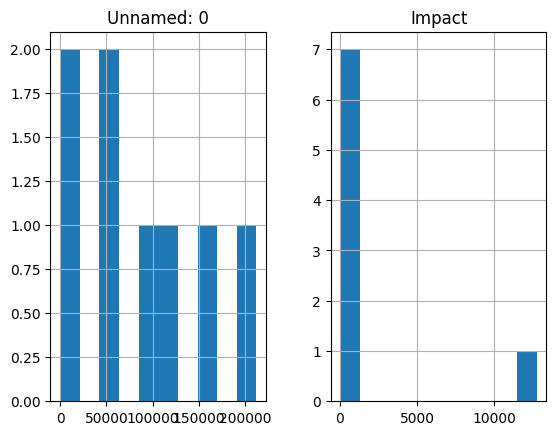

In [77]:
data[data['description'].isnull()].describe().hist();

In [ ]:
data[data['description'].isnull()].groupby(['publisher', 'authors']).describe()